### LINEAR REGRESSION 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

%matplotlib inline

In [4]:
df=pd.read_csv("USA_HOUSING.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


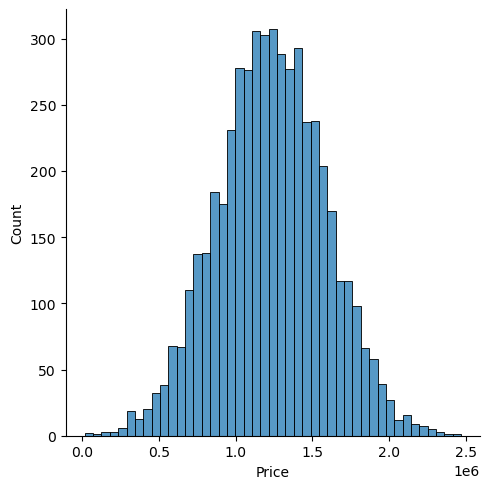

In [15]:
sns.displot(df["Price"])
plt.show()

In [23]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [33]:
a=df.drop("Address",axis=1)
a.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


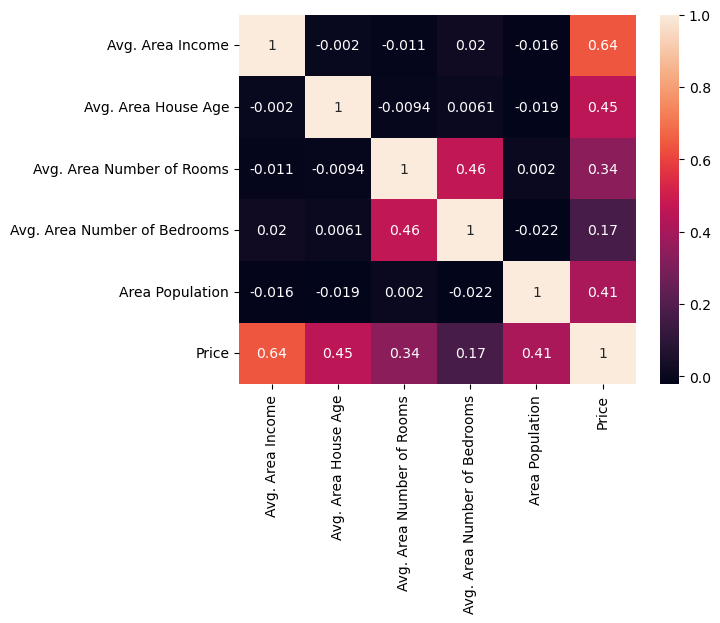

In [35]:
sns.heatmap(a.corr(),annot=True)
plt.show()

In [37]:
# 1) split into TRAIN and TEST data

x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=df["Price"]


In [39]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.4,random_state=101)

In [45]:
# 2) train the model 
from sklearn.linear_model import LinearRegression

In [47]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [49]:
# 3) finding the coefficients AND  predicting outputs
print(lm.intercept_)

-2640159.7968525277


In [55]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [71]:
cdf= pd.DataFrame(lm.coef_,index=x_train.columns,columns=["WEIGHTS"])
cdf

,WEIGHTS
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [87]:
# How to take in  datasets from sklearn

from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

gg=pd.DataFrame(X,columns=diabetes.feature_names)
gg["target"]=y
gg.index.names=["Patient NO."]

gg

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
Patient NO.,,,,,,,,,,,
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0


In [89]:
# predictions = predicts outputs for the test data

predictions= lm.predict(x_test)
predictions

array([1260960.70567627,  827588.75560334, 1742421.2425434 , ...,
        372191.40626923, 1365217.15140897, 1914519.5417887 ])

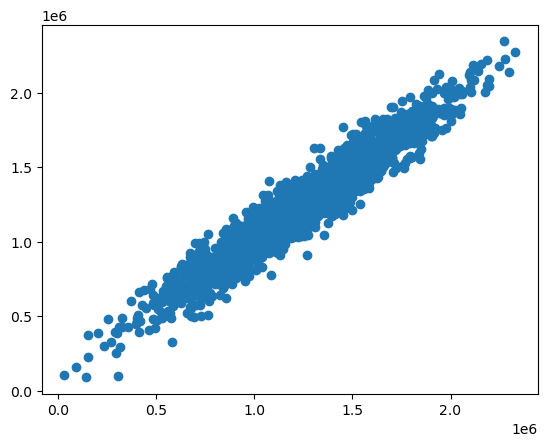

In [91]:
plt.scatter(y_test,predictions)
plt.show()

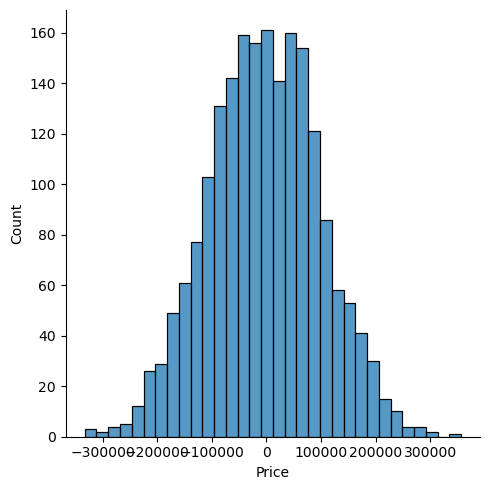

In [99]:
# if the (y_test - predictions) is normally distributed then this means that the choice of ML Algorithm/Model was correct 

sns.displot((y_test-predictions))
plt.show()

In [101]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914947
MSE: 10460958907.209057
RMSE: 102278.82922290935


### LOGISTIC REGRESSION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train["Pclass"].dtype

dtype('int64')

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:

a=train[train["Age"].isnull()]
a.count()

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64

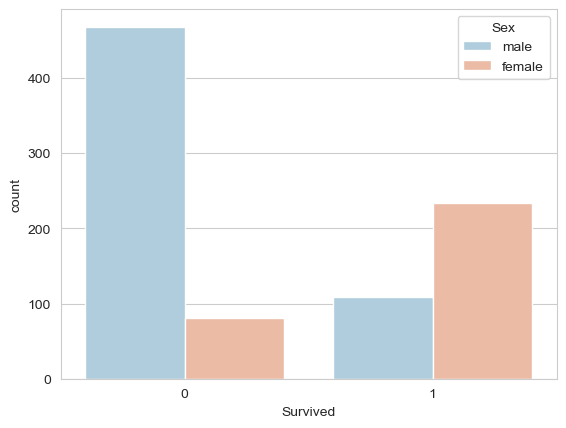

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue="Sex",palette='RdBu_r')
plt.show()

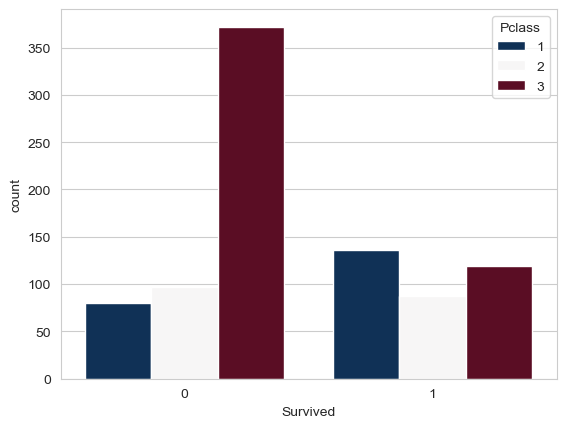

In [9]:
sns.countplot(x='Survived',data=train,hue="Pclass",palette='RdBu_r')
plt.show()

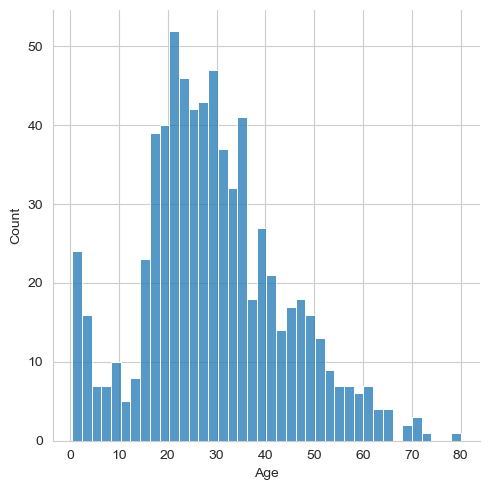

In [10]:
sns.displot(train["Age"].dropna(),bins=40)
plt.show()

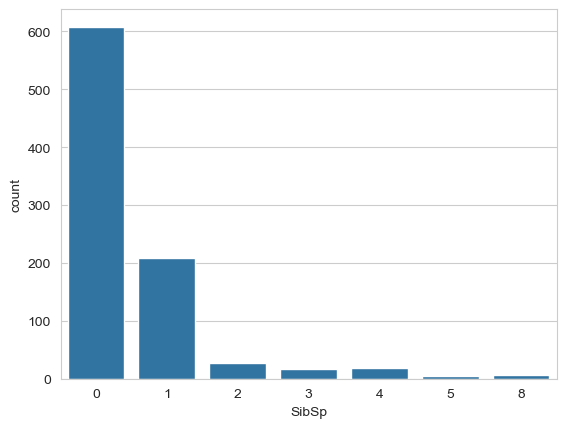

In [11]:
sns.countplot(x="SibSp",data=train)
plt.show()

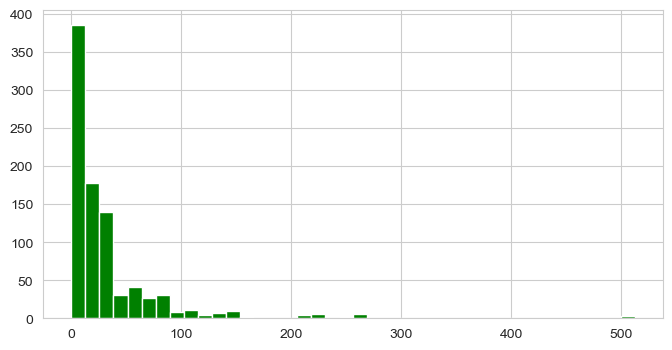

In [12]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
train["Fare"].iplot(kind= "hist", bins =80)

### how to deal with missing data 


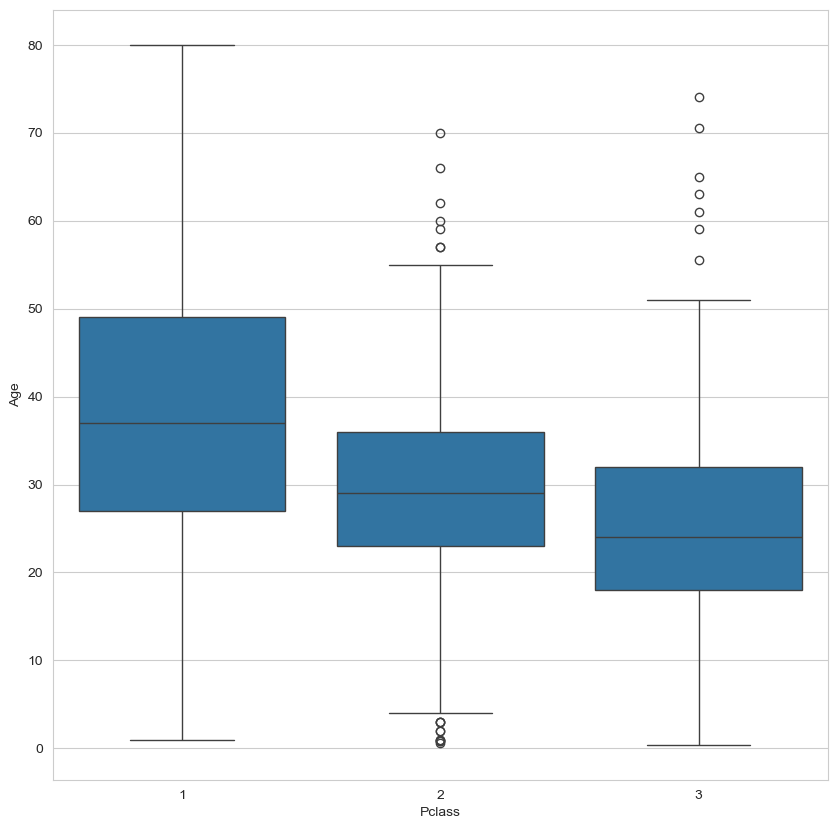

In [16]:
# based on the class 
plt.figure(figsize=(10,10))
sns.boxplot(x="Pclass" , y= "Age",data=train)
plt.show()

In [17]:
for i in range(1, 4):
    median_age = np.median(train[train["Pclass"] == i]["Age"].dropna())
    print(f"Pclass {i} - Median Age: {median_age}")


Pclass 1 - Median Age: 37.0
Pclass 2 - Median Age: 29.0
Pclass 3 - Median Age: 24.0


In [18]:
def impute_age(row):
    if pd.isnull(row["Age"]):
        if row["Pclass"] == 1:
            return 37
        elif row["Pclass"] == 2:
            return 29
        else:
            return 24
    else:
        return row["Age"]
train["Age"]=train.apply(impute_age,axis=1)

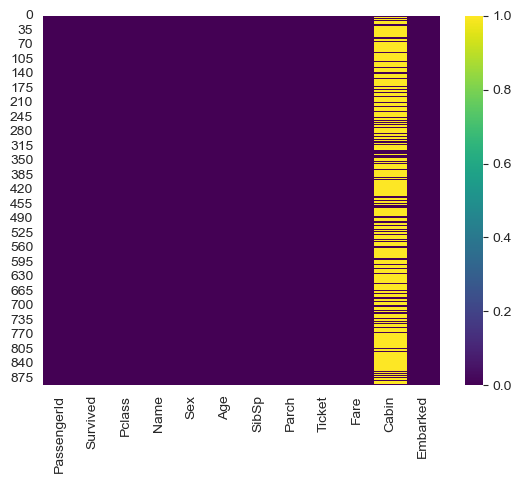

In [19]:

sns.heatmap(train.isnull(),cmap="viridis")
plt.show()

In [20]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df["Age"]=df.apply(impute_age,axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
#converts categorical variables to numerical values so 
#that an ML model can take it as input

sex=pd.get_dummies(df["Sex"],drop_first=True).astype(int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


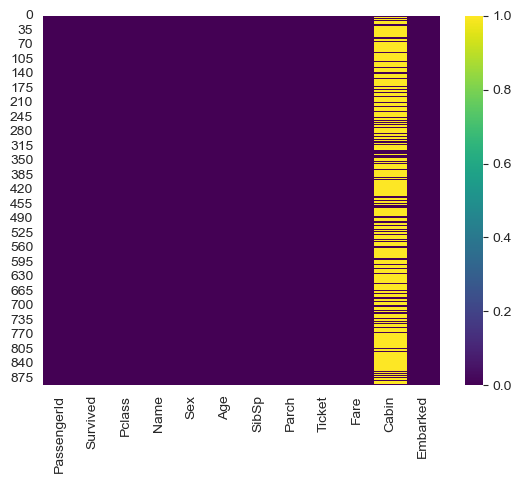

In [23]:
sns.heatmap( df.isnull() , cmap="viridis")
plt.show()

In [24]:


df=pd.concat([df,sex],axis=1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [25]:
df.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male
0,1,0,3,22.0,1,0,7.2500,NaN,1
1,2,1,1,38.0,1,0,71.2833,C85,0
2,3,1,3,26.0,0,0,7.9250,NaN,0
3,4,1,1,35.0,1,0,53.1000,C123,0
4,5,0,3,35.0,0,0,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN,1
887,888,1,1,19.0,0,0,30.0000,B42,0
888,889,0,3,24.0,1,2,23.4500,NaN,0
889,890,1,1,26.0,0,0,30.0000,C148,1


In [26]:
df.drop("PassengerId",axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male
0,0,3,22.0,1,0,7.2500,NaN,1
1,1,1,38.0,1,0,71.2833,C85,0
2,1,3,26.0,0,0,7.9250,NaN,0
3,1,1,35.0,1,0,53.1000,C123,0
4,0,3,35.0,0,0,8.0500,NaN,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,1
887,1,1,19.0,0,0,30.0000,B42,0
888,0,3,24.0,1,2,23.4500,NaN,0
889,1,1,26.0,0,0,30.0000,C148,1


In [27]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [29]:
ss=df
ssPclass=pd.get_dummies(ss["Pclass"],drop_first=True).astype(int)
ssPclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [61]:
pd.concat([ss,ssPclass])
ss.drop("Cabin",axis=1,inplace=True)
ss

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,24.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


### BUILDING THE LOGISTIC REGRESSION MODEL

In [110]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [112]:
from sklearn.model_selection import train_test_split

In [114]:
x_train , x_test ,y_train ,y_test =  train_test_split(x,y,test_size=0.3,random_state=101)

In [116]:
from sklearn.linear_model import LogisticRegression

In [118]:
lgr=LogisticRegression()

In [120]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [122]:
predictions=lgr.predict(x_test)

In [124]:
from sklearn.metrics import classification_report


In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [106]:
from sklearn.metrics import confusion_matrix

In [108]:
cm=confusion_matrix(y_test , predictions)
cm

array([[132,  22],
       [ 39,  75]], dtype=int64)

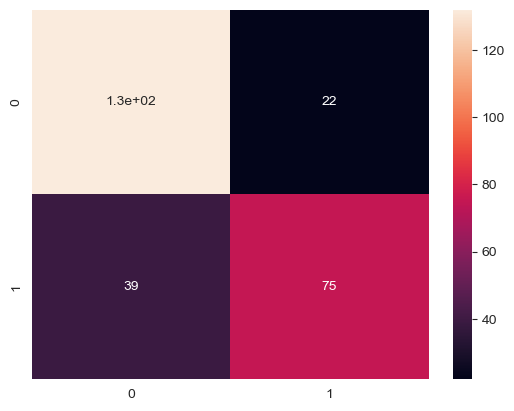

In [82]:
sns.heatmap(cm , annot =True)
plt.show()